In [1]:
using LinearAlgebra

In [8]:
using Images, Interact

HTML{String}("    <script id=\"webio-setup-2144785429522864028\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-1643400065409944135\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-2144785429522864028\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/28f5f30a59da434290b7f09bd0d0ddea74a5f34e-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/28f5f30a59da434290b7f09bd0d0ddea74a5f34e-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-1643400065409944135\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

In [6]:
download("https://pbs.twimg.com/profile_images/652384843314122752/SRS6w9ht_400x400.jpg","watermelon.jpg")

"watermelon.jpg"

┌ Info: Recompiling stale cache file C:\Users\Ali\.julia\compiled\v1.0\ImageMagick\0LbNX.ji for ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1184


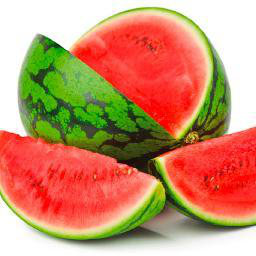

In [10]:
watermelon = load("watermelon.jpg")

In [12]:
download("https://images.freshop.com/8039572/237b6f1e4bc4e7a717b07421dd289245_medium.png", "cantaloupe.png")

"cantaloupe.png"

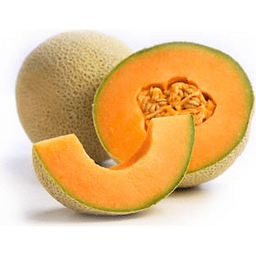

In [13]:
cantaloupe = load("cantaloupe.png")

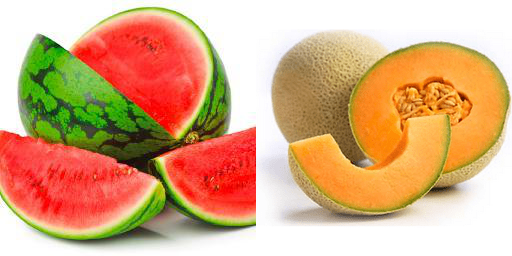

In [14]:
[watermelon cantaloupe]

In [15]:
watermelon_array = float.(channelview(watermelon))
cantaloupe_array = float.(channelview(cantaloupe))

3×256×256 Array{Float32,3}:
[:, :, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 2] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

[:, :, 3] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0

...

[:, :, 254] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.

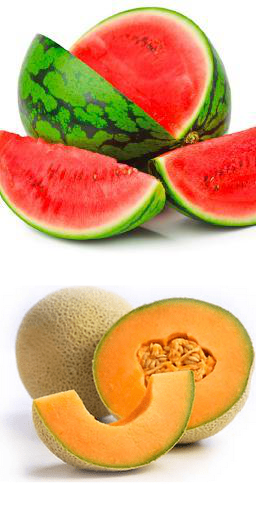

In [16]:
[watermelon; cantaloupe]

In [17]:
function gsvd_approx(A,B,start,k)
    U,V,Q,C,S,R0 = svd(A,B)
    H = R0*Q'
    println(size(H))
   
    ι = start:(start+k-1)
    
     AA = U[:,ι] * C[ι,ι] * H[ι, :]
     BB = V[:,ι] * S[ι,ι] * H[ι, :]
     AA = min.(max.(AA, 0.0), 1.)
     BB = min.(max.(BB, 0.0), 1.)
     [AA BB]
end

gsvd_approx (generic function with 1 method)

(256, 256)
(256, 256)
(256, 256)


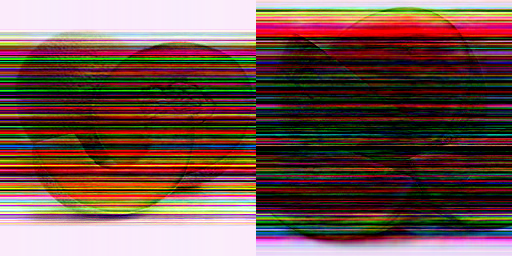

In [30]:
start=50
    colorview(  RGB, 
                gsvd_approx(cantaloupe_array[1,:,:], watermelon_array[1,:,:], start, 150),
                gsvd_approx(cantaloupe_array[2,:,:], watermelon_array[2,:,:], start, 150),
                gsvd_approx(cantaloupe_array[3,:,:], watermelon_array[3,:,:], start, 150)
    )

(256, 256)
(256, 256)
(256, 256)


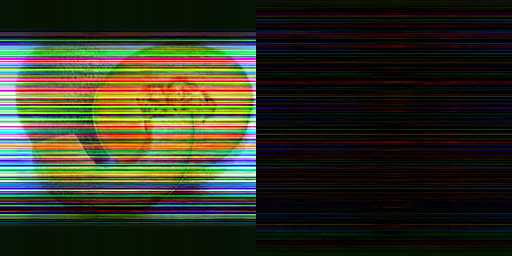

In [33]:
start=1
    colorview(  RGB, 
                gsvd_approx(cantaloupe_array[1,:,:], watermelon_array[1,:,:], start, 50),
                gsvd_approx(cantaloupe_array[2,:,:], watermelon_array[2,:,:], start, 50),
                gsvd_approx(cantaloupe_array[3,:,:], watermelon_array[3,:,:], start, 50)
    )
